#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
df.shape

(148654, 13)

In [4]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [5]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [6]:
salary = df.TotalPay

In [7]:
salary.describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [8]:
mean  = salary.mean()
print(mean)

74768.321971703


In [9]:
mode = np.max(salary) - np.min(salary)
print(mode)

568213.56


In [10]:
med = salary.median()
print(med)

71426.60999999999


In [11]:
df = df.drop(columns=['Notes','Status'])
df.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [12]:
df = df.dropna()
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

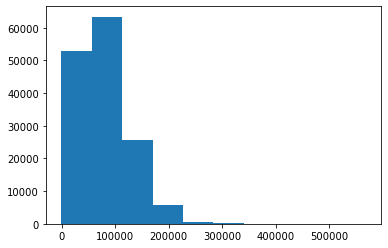

In [13]:
from matplotlib import pyplot as plt
plt.hist(salary)
plt.show()

In [19]:
number = df['JobTitle'].value_counts()
number

Transit Operator                  6975
Special Nurse                     4382
Registered Nurse                  3725
Public Svc Aide-Public Works      2514
Police Officer 3                  2411
                                  ... 
Commissioner 16.700c, No Pay         1
Chief Investment Officer             1
Chief Forensic Toxicologist          1
Lieutenant (Police Department)       1
Cashier 3                            1
Name: JobTitle, Length: 1109, dtype: int64

In [25]:
data = pd.DataFrame({'JobTitle': counts.index, 'Number': number.values})

data


,JobTitle,Number
0,Transit Operator,6975
1,Special Nurse,4382
2,Registered Nurse,3725
3,Public Svc Aide-Public Works,2514
4,Police Officer 3,2411
...,...,...
1104,"Commissioner 16.700c, No Pay",1
1105,Chief Investment Officer,1
1106,Chief Forensic Toxicologist,1
1107,Lieutenant (Police Department),1


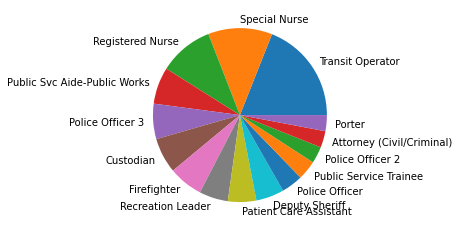

In [29]:
plt.pie(data.Number.head(15) ,labels = data.JobTitle.head(15))
plt.show()

In [31]:
group = df.groupby('JobTitle')['TotalPay'].agg(['mean', 'median', 'min', 'max', 'std', 'count']).reset_index()
group

,JobTitle,mean,median,min,max,std,count
0,"ACPO,JuvP, Juv Prob (SFERS)",62290.780000,62290.780,62290.78,62290.78,NaN,1
1,ASR Senior Office Specialist,63519.363167,65824.065,15354.90,124469.21,15982.711217,60
2,ASR-Office Assistant,41511.501951,46930.610,7898.88,57186.13,15230.019656,41
3,Account Clerk,43145.753774,52891.030,0.00,64275.68,17729.839875,265
4,Accountant I,62036.101250,67403.330,19919.23,71605.00,17287.340334,8
...,...,...,...,...,...,...,...
1104,Wire Rope Cable Maint Sprv,203033.720000,193691.790,190575.90,224833.47,18943.310631,3
1105,Worker's Comp Supervisor 1,70389.297143,92558.110,56.64,108810.03,38380.304769,14
1106,Worker's Compensation Adjuster,73249.269865,80348.540,1837.39,106050.66,20057.372880,74
1107,X-Ray Laboratory Aide,50823.942700,60047.290,1007.00,99812.97,24170.083004,100


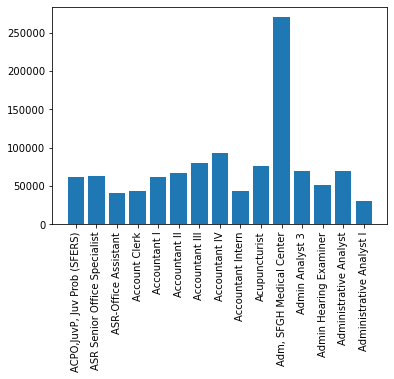

In [37]:
plt.bar(group['JobTitle'].head(15),group['mean'].head(15))
plt.xticks(rotation = 'vertical')
plt.show()

# Good Luck!